                                      Titanic survived Project
Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

In [2]:
train=pd.read_csv(r"C:\Users\HP\Downloads\titanic_train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Exploratory analysis 

In [3]:
train.shape

(891, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In this data there are 5 categorical data and 7 numerical data presented, also null presented in some columns.

In [5]:
#finding null values
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

out of 12 columns 3 columns(Age, Cabin, Embarked) have null values.


In [6]:
Age=(177/891)*100
Cabin=(687/891)*100
Embarked=(2/891)*100
print(Age)
print(Cabin)
print(Embarked)

19.865319865319865
77.10437710437711
0.22446689113355783


1. In age column there are 19% null values and in embarked column only 0.22% null values presented. so we can easily fill those null values.
2. In Cabin column there are 77%  null values presented in these column, it is not good for filling the null values so i am dropping this column.

In [7]:
train.drop('Cabin', axis=1, inplace=True)

In [8]:
#drop name column
train=train.drop('Name', axis=1)

In [9]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,S
887,888,1,1,female,19.0,0,0,112053,30.0000,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C


In [10]:
train=train.set_index('PassengerId')
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,S
888,1,1,female,19.0,0,0,112053,30.0000,S
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S


In [11]:
train.columns.tolist()

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

In [12]:
train.shape

(891, 9)

In [13]:
#checking unique values for given dataset

train.nunique().to_frame("Unique values")

,Unique values
Survived,2
Pclass,3
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248
Embarked,3


In [14]:
#finding value counts of each columns
train['Survived'].unique()

array([0, 1], dtype=int64)

In [15]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [16]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [17]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [18]:
train['Parch'].unique()


array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [19]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [20]:
train['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [21]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [22]:
#drop ticket column
train=train.drop('Ticket', axis=1)

Here i am dropping the ticket column becuase it contains full of unique values.

In [23]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
for k in train.columns:
    print(train[k].value_counts())
    print('\n')

0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64


0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64


S    644
C    168
Q     77
Name: Embarked, dtype: int64




In [25]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

In [26]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [27]:
train.loc[pd.isna(train["Embarked"]), :].index

Int64Index([62, 830], dtype='int64', name='PassengerId')

In [28]:
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [29]:
train[train['Embarked'].isna()]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
62,1,1,female,38.0,0,0,80.0,NaN
830,1,1,female,62.0,0,0,80.0,NaN


In [30]:
train['Embarked'].fillna('S', inplace=True)

In [31]:
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

finally, there is no null values in the given dataset.

In [32]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S
2,1,1,female,38.000000,1,0,71.2833,C
3,1,3,female,26.000000,0,0,7.9250,S
4,1,1,female,35.000000,1,0,53.1000,S
5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S
888,1,1,female,19.000000,0,0,30.0000,S
889,0,3,female,29.699118,1,2,23.4500,S


In [33]:
a=train.drop('Survived',axis=1)
b=train['Survived']

In [34]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
train.shape

(891, 8)

In [36]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

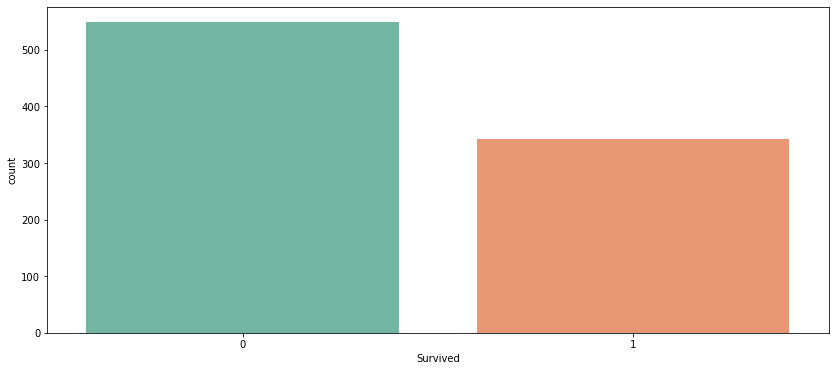

In [37]:
plt.figure(figsize=(14,6))
sns.countplot(train['Survived'], palette = 'Set2')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

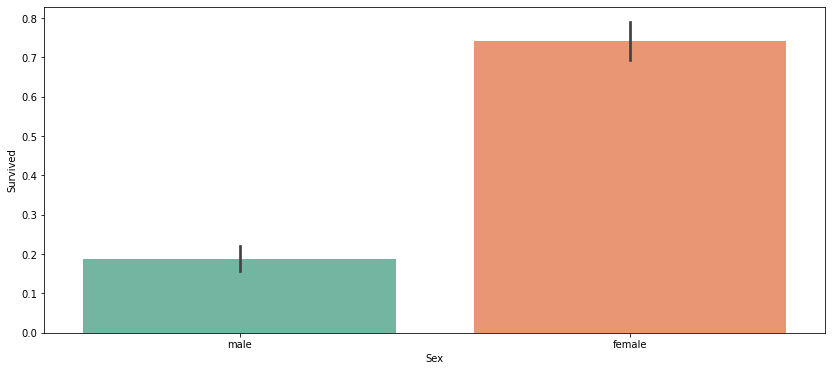

In [38]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'Sex', y = 'Survived', data =train, palette = 'Set2')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

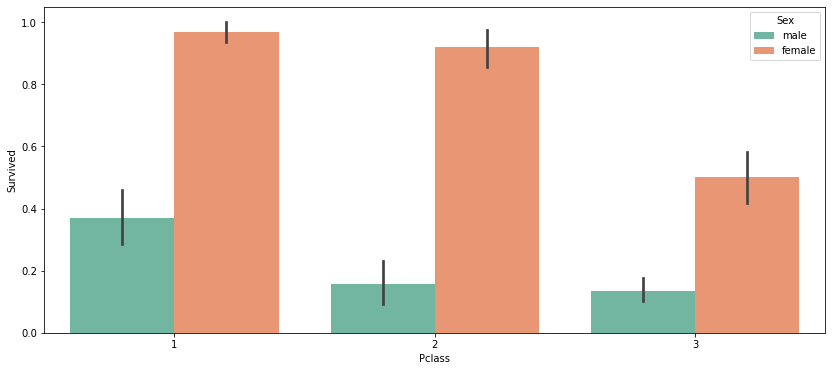

In [39]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'Pclass', y = 'Survived', data =train,hue='Sex', palette = 'Set2')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

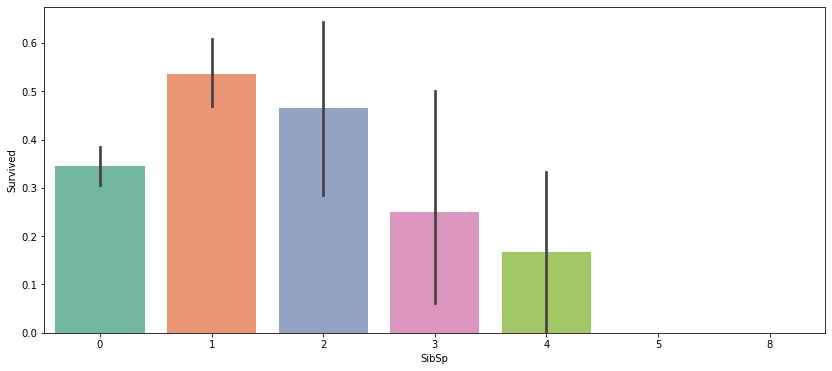

In [40]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'SibSp', y = 'Survived', data =train, palette = 'Set2')

<AxesSubplot:xlabel='Age', ylabel='Survived'>

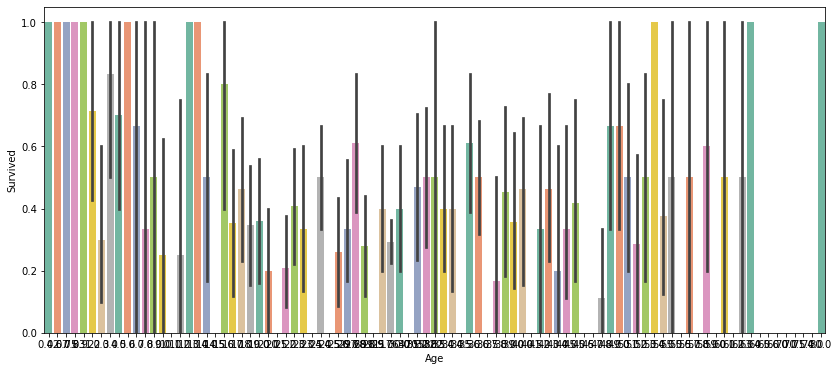

In [41]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'Age', y = 'Survived', data =train, palette = 'Set2')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

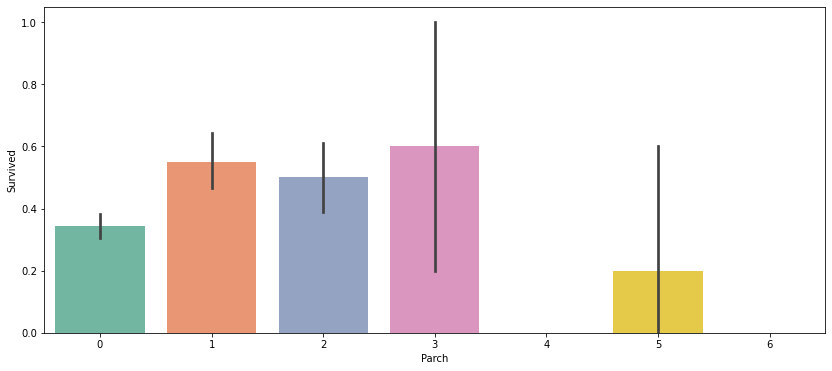

In [42]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'Parch', y = 'Survived', data =train, palette = 'Set2')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

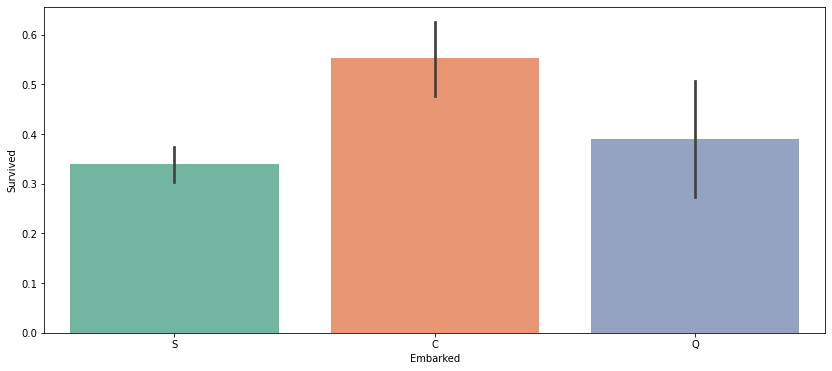

In [43]:
plt.figure(figsize=(14,6))
sns.barplot(x = 'Embarked', y = 'Survived', data =train, palette = 'Set2')

<AxesSubplot:xlabel='Pclass', ylabel='Sex'>

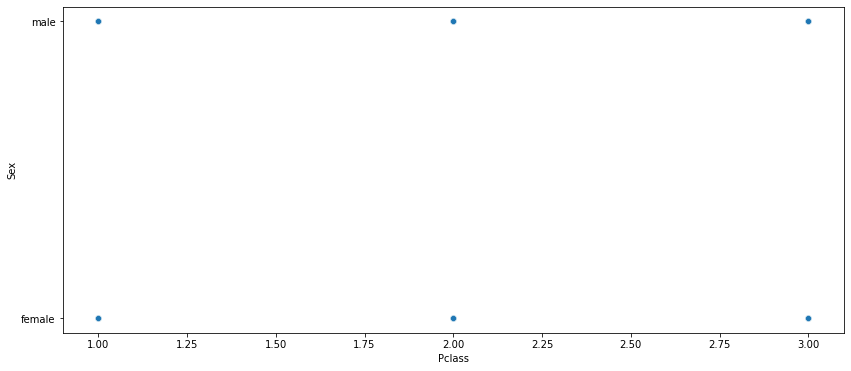

In [44]:
plt.figure(figsize=(14,6))
sns.scatterplot(x = 'Pclass', y = 'Sex', data =train, palette = 'Set2')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

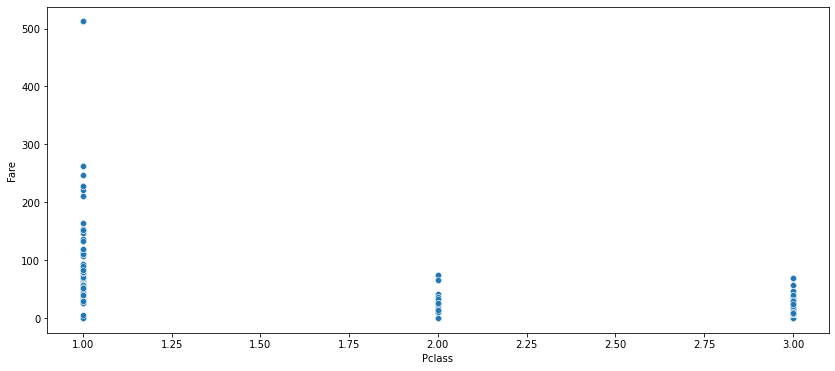

In [45]:
plt.figure(figsize=(14,6))
sns.scatterplot(x = 'Pclass', y = 'Fare', data =train, palette = 'Set2')

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

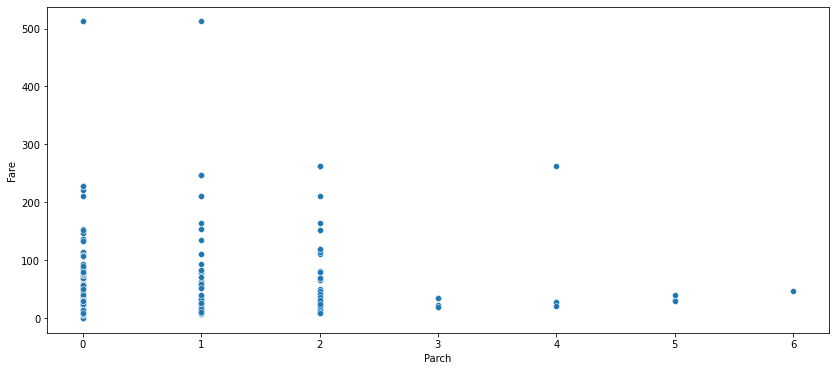

In [46]:
plt.figure(figsize=(14,6))
sns.scatterplot(x = 'Parch', y = 'Fare', data =train, palette = 'Set2')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

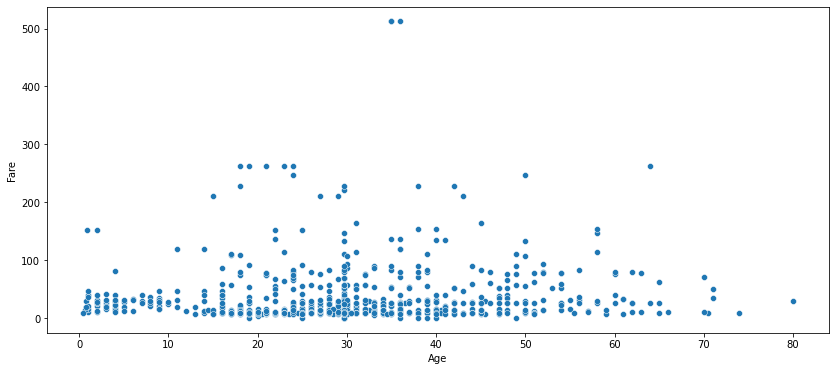

In [47]:
plt.figure(figsize=(14,6))
sns.scatterplot(x = 'Age', y = 'Fare', data =train, palette = 'Set2')

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

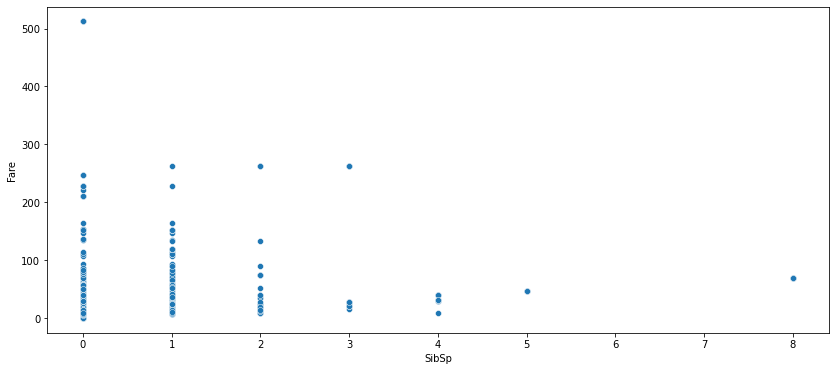

In [48]:
plt.figure(figsize=(14,6))
sns.scatterplot(x = 'SibSp', y = 'Fare', data =train, palette = 'Set2')

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

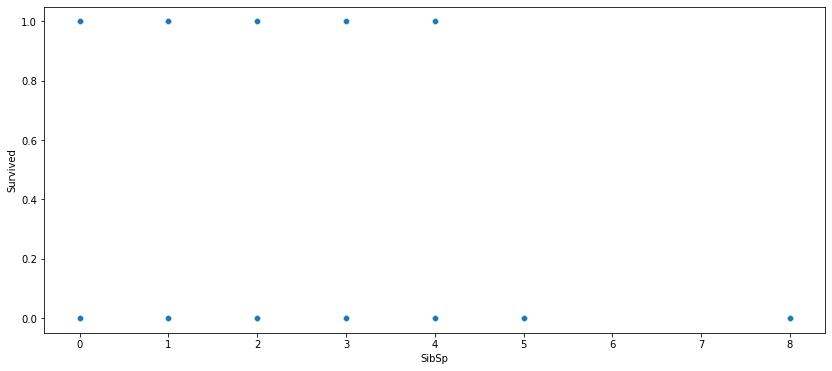

In [49]:
plt.figure(figsize=(14,6))
sns.scatterplot(x = 'SibSp', y = 'Survived', data =train, palette = 'Set2')

In [50]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [51]:
titanic_data={'Sex':{'male':0,'female':1},
          'Embarked':{'S':1,'C':2,'Q':3}
           }
titanic=train.copy()
titanic.replace(titanic_data, inplace=True)

In [52]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,1
2,1,1,1,38.0,1,0,71.2833,2
3,1,3,1,26.0,0,0,7.9250,1
4,1,1,1,35.0,1,0,53.1000,1
5,0,3,0,35.0,0,0,8.0500,1


In [53]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,1.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


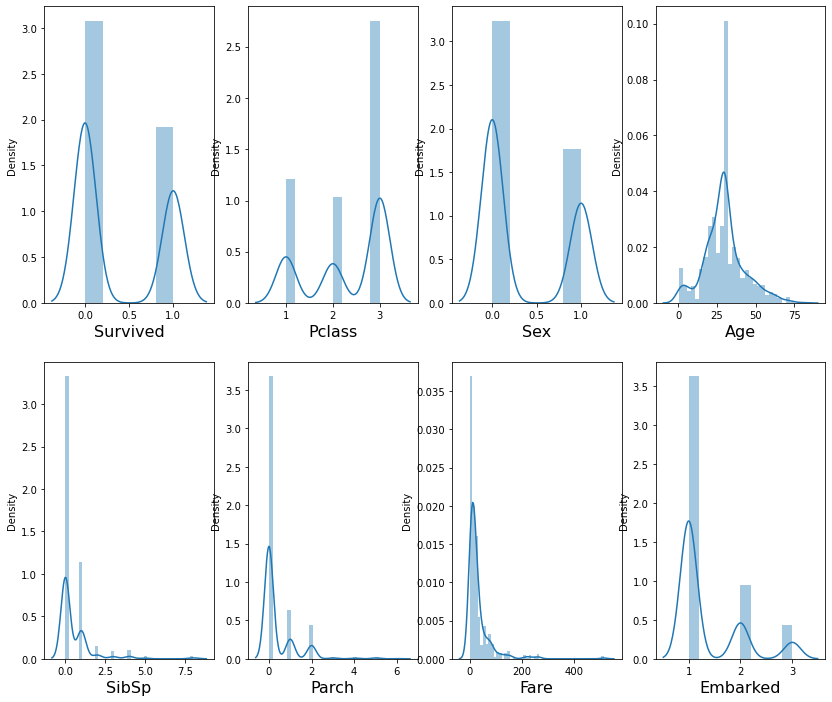

In [54]:
plt.figure(figsize=(14,12),facecolor="white")
plotnumber=1
for columns in titanic:
    if plotnumber<=8:
    
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(titanic[columns])
        plt.xlabel(columns, fontsize=16)
    plotnumber+=1
plt.show()

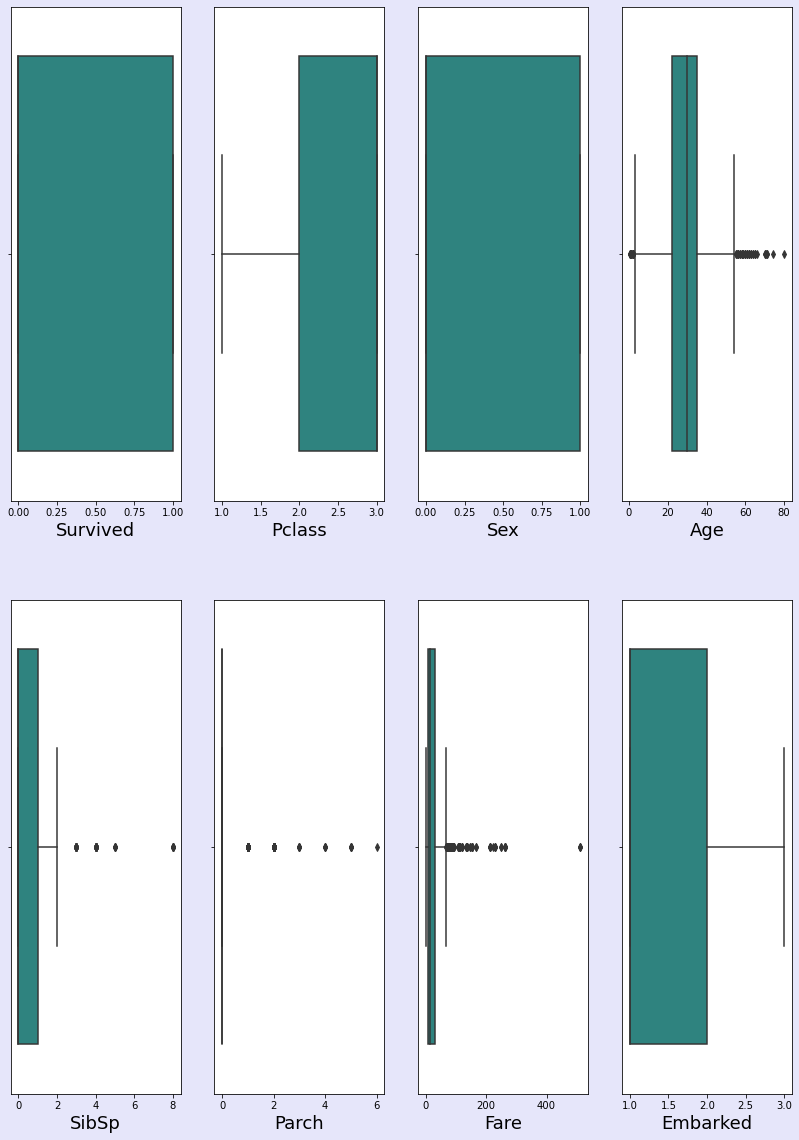

In [55]:
plt.figure(figsize=(14,20), facecolor="lavender")
plotnumber=1
for column in titanic:
    if plotnumber<=8:
    
        ax=plt.subplot(2,4,plotnumber)
        sns.boxplot(titanic[column], palette="viridis")
        plt.xlabel(column, fontsize=18)
        plt.yticks(rotation=0, fontsize=16)
    plotnumber+=1
plt.show()

In [56]:
titanic.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

In [57]:
corr=titanic.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


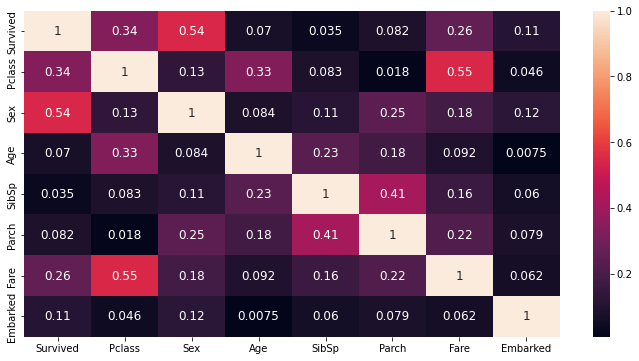

In [58]:
df_corr=titanic.corr().abs()
plt.figure(figsize=(12,6))
sns.heatmap(df_corr, annot=True, linecolor='pink', annot_kws={'size':12},)
plt.show()

In [59]:
titanic=titanic.drop('Fare', axis=1)

In [60]:
a=titanic.drop(columns=['Survived'])
b=titanic['Survived']

In [61]:
scaler=StandardScaler()
a=pd.DataFrame(scaler.fit_transform(a),columns=a.columns)
a

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0.827377,-0.737695,-0.592481,0.432793,-0.473674,-0.568837
1,-1.566107,1.355574,0.638789,0.432793,-0.473674,1.005181
2,0.827377,1.355574,-0.284663,-0.474545,-0.473674,-0.568837
3,-1.566107,1.355574,0.407926,0.432793,-0.473674,-0.568837
4,0.827377,-0.737695,0.407926,-0.474545,-0.473674,-0.568837
...,...,...,...,...,...,...
886,-0.369365,-0.737695,-0.207709,-0.474545,-0.473674,-0.568837
887,-1.566107,1.355574,-0.823344,-0.474545,-0.473674,-0.568837
888,0.827377,1.355574,0.000000,0.432793,2.008933,-0.568837
889,-1.566107,-0.737695,-0.284663,-0.474545,-0.473674,1.005181


In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(a.values,i) for i in range(len(a.columns))] 

vif['features']=a.columns
vif

,VIF values,features
0,1.163919,Pclass
1,1.121326,Sex
2,1.203195,Age
3,1.249398,SibSp
4,1.287815,Parch
5,1.033240,Embarked


there is no multicolinearity issues.

In [63]:
#balancing the label values.
from imblearn.over_sampling import SMOTE
sampling= SMOTE()

a,b=sampling.fit_resample(a,b)

In [64]:
b.value_counts()

0    549
1    549
Name: Survived, dtype: int64

In [65]:
scaler=StandardScaler()

x_scaled=scaler.fit_transform(a)
x_scaled

array([[ 0.8940751 , -0.83647499, -0.59054955,  0.4726788 , -0.48363832,
        -0.59760956],
       [-1.45598949,  1.19549301,  0.65170824,  0.4726788 , -0.48363832,
         0.96914427],
       [ 0.8940751 ,  1.19549301, -0.2799851 , -0.49900307, -0.48363832,
        -0.59760956],
       ...,
       [ 0.8940751 ,  1.19549301,  0.0072185 , -0.49900307, -0.48363832,
         2.5358981 ],
       [-0.2809572 ,  1.19549301, -0.25420078,  0.4726788 , -0.48363832,
         0.96914427],
       [ 0.8940751 , -0.83647499,  0.18586157, -0.49900307, -0.48363832,
        -0.59760956]])

In [68]:
#getting best random state

Accu_max=0
Rs_max=0
for k in range(1,650):
    x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.25, random_state=k)
    
    GB=GradientBoostingClassifier()
    GB.fit(x_train,y_train)
    
    pred=GB.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu_max:
        Accu_max= acc
        Rs_max=k
print('The best accuracy is', Accu_max, 'at random state is', Rs_max)

The best accuracy is 0.8836363636363637 at random state is 591


In [69]:
#forming train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b, test_size=0.25, random_state=591)

In [70]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [71]:
def metric_score(clf, x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n================ Train Result ================== ")
        print(f"Accuracy Score: {accuracy_score(y_train,y_pred)*100:2f}%")
        
        
    elif train==False:
        
        pred=clf.predict(x_test)
        
        print("\n================ Test Result ================== ")
        print(f"Accuracy Score: {accuracy_score(y_test,pred)*100:2f}%")
        print('\n \n Test Classification Reprt \n', classification_report(y_test,pred, digits=2))
        

In [72]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
metric_score(dc,x_train,x_test,y_train,y_test, train=True)
metric_score(dc,x_train,x_test,y_train,y_test, train=False)
y_pred=dc.predict(x_test)
probs_dc=dc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Train Result ================== 
Accuracy Score: 94.167679%

================ Test Result ================== 
Accuracy Score: 85.090909%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       140
           1       0.85      0.85      0.85       135

    accuracy                           0.85       275
   macro avg       0.85      0.85      0.85       275
weighted avg       0.85      0.85      0.85       275



array([[119,  21],
       [ 20, 115]], dtype=int64)

In [73]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
metric_score(kn,x_train,x_test,y_train,y_test, train=True)
metric_score(kn,x_train,x_test,y_train,y_test, train=False)
y_pred=kn.predict(x_test)
probs_kn=kn.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Train Result ================== 
Accuracy Score: 82.989064%

================ Test Result ================== 
Accuracy Score: 84.363636%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       140
           1       0.82      0.87      0.85       135

    accuracy                           0.84       275
   macro avg       0.84      0.84      0.84       275
weighted avg       0.85      0.84      0.84       275



array([[114,  26],
       [ 17, 118]], dtype=int64)

In [74]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
metric_score(rfc,x_train,x_test,y_train,y_test, train=True)
metric_score(rfc,x_train,x_test,y_train,y_test, train=False)
y_pred=rfc.predict(x_test)
probs_rfc=rfc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Train Result ================== 
Accuracy Score: 94.167679%

================ Test Result ================== 
Accuracy Score: 85.090909%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       140
           1       0.83      0.88      0.85       135

    accuracy                           0.85       275
   macro avg       0.85      0.85      0.85       275
weighted avg       0.85      0.85      0.85       275



array([[115,  25],
       [ 16, 119]], dtype=int64)

In [75]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
metric_score(GB,x_train,x_test,y_train,y_test, train=True)
metric_score(GB,x_train,x_test,y_train,y_test, train=False)
y_pred=GB.predict(x_test)
probs_GB=GB.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Train Result ================== 
Accuracy Score: 86.269745%

================ Test Result ================== 
Accuracy Score: 88.000000%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       140
           1       0.86      0.90      0.88       135

    accuracy                           0.88       275
   macro avg       0.88      0.88      0.88       275
weighted avg       0.88      0.88      0.88       275



array([[121,  19],
       [ 14, 121]], dtype=int64)

In [76]:
bag=BaggingClassifier()
bag.fit(x_train,y_train)
metric_score(bag,x_train,x_test,y_train,y_test, train=True)
metric_score(bag,x_train,x_test,y_train,y_test, train=False)
y_pred=bag.predict(x_test)
confusion_matrix(y_test,y_pred)


================ Train Result ================== 
Accuracy Score: 92.709599%

================ Test Result ================== 
Accuracy Score: 87.636364%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       140
           1       0.87      0.87      0.87       135

    accuracy                           0.88       275
   macro avg       0.88      0.88      0.88       275
weighted avg       0.88      0.88      0.88       275



array([[123,  17],
       [ 17, 118]], dtype=int64)

In [77]:
Etc=ExtraTreesClassifier()
Etc.fit(x_train,y_train)
metric_score(Etc,x_train,x_test,y_train,y_test, train=True)
metric_score(Etc,x_train,x_test,y_train,y_test, train=False)
y_pred=Etc.predict(x_test)
probs_Etc=Etc.predict_proba(x_scaled)[:,1]
confusion_matrix(y_test,y_pred)


================ Train Result ================== 
Accuracy Score: 94.167679%

================ Test Result ================== 
Accuracy Score: 84.363636%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       140
           1       0.82      0.87      0.84       135

    accuracy                           0.84       275
   macro avg       0.84      0.84      0.84       275
weighted avg       0.84      0.84      0.84       275



array([[115,  25],
       [ 18, 117]], dtype=int64)

In [78]:
svc=SVC()
svc.fit(x_train,y_train)
metric_score(svc,x_train,x_test,y_train,y_test, train=True)
metric_score(svc,x_train,x_test,y_train,y_test, train=False)
y_pred=svc.predict(x_test)

confusion_matrix(y_test,y_pred)


================ Train Result ================== 
Accuracy Score: 80.194411%

================ Test Result ================== 
Accuracy Score: 85.454545%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.90      0.81      0.85       140
           1       0.82      0.90      0.86       135

    accuracy                           0.85       275
   macro avg       0.86      0.86      0.85       275
weighted avg       0.86      0.85      0.85       275



array([[113,  27],
       [ 13, 122]], dtype=int64)

Cross validation:

In [80]:
score=cross_val_score(svc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.77272727 0.80454545 0.76363636 0.83561644 0.77625571]
0.7905562474055625
Difference between Accuracy score and cross validation score is-  -0.25964715649647163


In [81]:
score=cross_val_score(dc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.75909091 0.83636364 0.78181818 0.82191781 0.83561644]
0.8069613947696139
Difference between Accuracy score and cross validation score is-  -0.27605230386052304


In [82]:
score=cross_val_score(kn, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.75       0.83636364 0.79545455 0.82191781 0.78082192]
0.7969115815691158
Difference between Accuracy score and cross validation score is-  -0.2660024906600249


In [83]:
score=cross_val_score(GB, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.76818182 0.81818182 0.77727273 0.84474886 0.83561644]
0.8088003320880034
Difference between Accuracy score and cross validation score is-  -0.2778912411789125


In [84]:
score=cross_val_score(Etc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.73636364 0.83181818 0.81818182 0.8173516  0.82191781]
0.805126608551266
Difference between Accuracy score and cross validation score is-  -0.27421751764217517


In [85]:
score=cross_val_score(bag, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.75909091 0.84090909 0.81363636 0.84474886 0.80821918]
0.8133208800332088
Difference between Accuracy score and cross validation score is-  -0.2824117891241179


In [86]:
score=cross_val_score(rfc, a,b)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is- ", accuracy_score(y_test, pred)-score.mean() )

[0.76818182 0.83181818 0.81363636 0.84474886 0.82191781]
0.816060606060606
Difference between Accuracy score and cross validation score is-  -0.28515151515151516


In [87]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],'min_samples_leaf':[5,10,15,20,30],'min_samples_split':[2,5,10,20],'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GridCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15, 20, 30],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [30, 50, 60]})

In [88]:
GridCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 30}

In [89]:
final_model=RandomForestClassifier( max_depth= 12, max_leaf_nodes= 15, min_samples_leaf= 1, min_samples_split=2,n_estimators=60)
final_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, max_leaf_nodes=15, n_estimators=60)

In [90]:
metric_score(final_model,x_train,x_test,y_train,y_test,train=False)


================ Test Result ================== 
Accuracy Score: 86.909091%

 
 Test Classification Reprt 
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       140
           1       0.86      0.87      0.87       135

    accuracy                           0.87       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.87      0.87      0.87       275



by tuning the parameter the accuracy score is increased.

In [91]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve

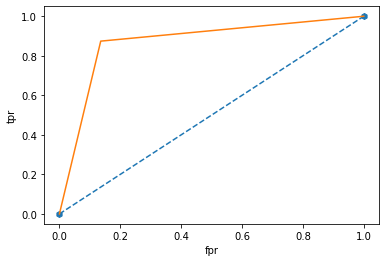

Auc Score is : 
 86.91798941798943


In [98]:
y_pred=final_model.predict(x_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

plt.plot([0,1],[0,1],'h--')
plt.plot(fpr,tpr, label="RandomForestClassifier"%roc_auc)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()
auc_score=roc_auc_score(y_test, final_model.predict(x_test))
print('Auc Score is :','\n', auc_score*100)

the auc score is 86.91.

In [93]:
#saving the model
import pickle
filename='Titanic train prediction'
pickle.dump(dc, open(filename,'wb'))


In [94]:
import pickle
loaded_model=pickle.load(open('Titanic train prediction','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

85.0909090909091


In [95]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=['original','predicted'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,265,266,267,268,269,270,271,272,273,274
original,0,1,1,1,1,1,0,0,0,1,...,1,1,0,1,0,0,1,0,0,1
predicted,0,1,0,1,1,1,1,0,0,1,...,1,1,0,1,0,0,1,0,1,1


Finally done